In [1]:
%load_ext autoreload
%autoreload 2
import torch 
import glob
from torchvision.io import read_image

In [2]:
images = glob.glob("renders/*.png")


all_images = torch.stack([read_image(p) for p in images]).cuda().float()
all_images /= 255.0

alpha_weighted = all_images[:,:3] * all_images[:,3:4]
avg_colors = alpha_weighted.sum(dim=(2,3)) / all_images[:,3:4].sum(dim=(2,3))

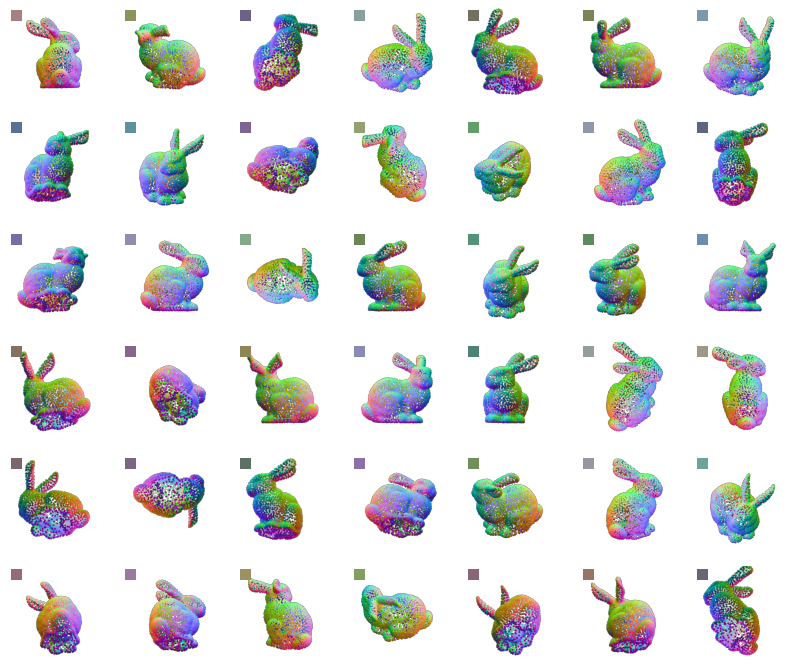

In [3]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

fig, axes = plt.subplots(6,7,figsize=(7*2,6*2))

for i in range(avg_colors.shape[0]):
    row = i//7
    col = i%7
    ax = axes[row][col]
    ax.imshow(all_images[i].cpu().permute((1,2,0)))
    ax.add_patch(Rectangle((10,10),30,30,facecolor=avg_colors[i].cpu().numpy()))
    ax.set_axis_off()

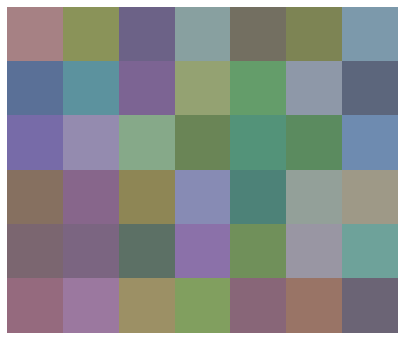

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(7,6))

ax.set_ylim((0,60))
ax.set_xlim((0,70))
ax.set_axis_off()
for i in range(avg_colors.shape[0]):
    row = 5- i//7
    col = i%7
    ax.add_patch(Rectangle((col*10,row*10),10,10,facecolor=avg_colors[i].cpu().numpy()))

In [5]:
from plyfile import PlyData, PlyElement
import numpy as np

plydata = PlyData.read('../sphere.ply')
positions = np.stack([plydata["vertex"].data["x"],plydata["vertex"].data["y"],plydata["vertex"].data["z"]]).T
cameras = torch.from_numpy(positions)

<Axes3DSubplot:>

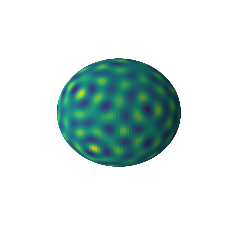

In [6]:
import numpy as np
import spherical_harmonics.torch 

from spherical_harmonics import SphericalHarmonics
from spherical_harmonics.utils import l2norm
from spherical_harmonics.plotting import plot_spherical_function

dimension = 3
max_degree = 20
# Returns all the spherical harmonics of degree 3 up to degree 10.
Phi = SphericalHarmonics(dimension, max_degree)

x = np.random.randn(101, dimension)  # Create random points to evaluation Phi
x = x / l2norm(x)  # normalize vectors
out = Phi(x)  # Evaluate spherical harmonics at `x`

func = lambda x: Phi(x)[:, -1]
plot_spherical_function(func,resolution=128)

torch.Size([98596])

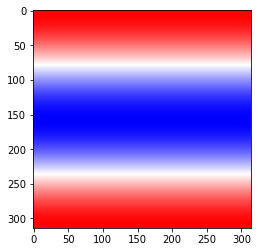

In [50]:

from sh import get_spherical_harmonics,get_spherical_harmonics_element

resolution = 100
x = torch.arange(0,3.14,1/resolution)
x_grid,y_grid = torch.meshgrid(x,x, indexing='ij')
values = get_spherical_harmonics_element(2,0,x_grid.flatten(),y_grid.flatten())

plt.imshow(values.reshape(x.shape[0],x.shape[0],1),cmap="bwr")
values.shape

In [46]:
values.shape

torch.Size([10000])

In [ ]:
y_grid.flatten().shape